In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
## Scalar function to take a single scalar value and return scalar values
def f(x):
    return 3*x**2 - 4*x + 5

In [7]:
f(3.0)

20.0

In [9]:
xs=np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [10]:
## Calling the fx function on y
ys=f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

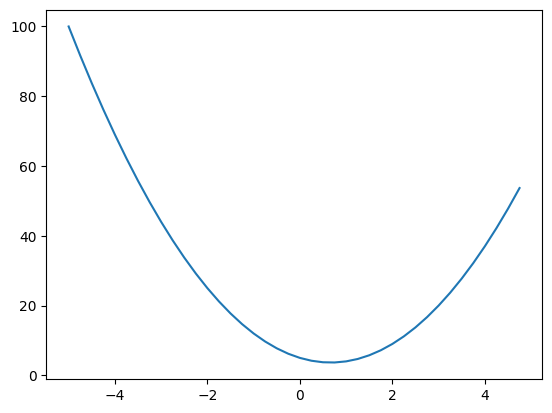

In [11]:
plt.plot(xs,ys)

In [3]:
## Derivative: https://en.wikipedia.org/wiki/Derivative
a=2.0
b=-3.0
c=10
d=a*b+c
## This would be our value for d1
print(d)

4.0


In [6]:
h=0.0001

## inputs 
a=2.0
b=-3.0
c=10.0

d1=a*b+c
print('c before adding h',c)
## Trying to keep the slope positive
c+=h
print('c after adding h',c)


d2=a*b+c
print('d1',d1)

print('d2',d2)
print('slope',d2-d1)

c before adding h 10.0
c after adding h 10.0001
d1 4.0
d2 4.0001
slope 9.999999999976694e-05


In [14]:
import math
class Value:
    def __init__(self,data,_children=(),_op='',label='') -> None:
        self.data=data
        #Gradient for each node initially zero
        self.grad=0.0
        self._prev=set(_children)
        self._op=_op
        self.label=label
    ## Provides a good way to return a typed format
    ## If we comment this out we will get a object string instead
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    def __add__(self,other):
        out=Value(self.data + other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out=Value(self.data * other.data,(self,other),'*')
        return out
    def tanh(self):
        x=self.data
        ## Tanh function
        ### Doc hyperbolic function : https://en.wikipedia.org/wiki/Hyperbolic_functions
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')
        return out
    

In [183]:
a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
print(f'Type of a {type(a)}')

Type of a <class '__main__.Value'>


In [184]:
# a+b

In [185]:
# a*b

In [186]:
d=a*b+c
d

Value(data=4.0)

In [187]:
## This is how we can use _children to see the previous value present
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [188]:
## To see the operations performed
d._op

'+'

### Now that we will be working with larger experession with the values class we need some code to visualize it as well 

## Visualization code


In [1]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad ), shape='record')

        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node
            dot.edge(uid + n._op, uid)

    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
        
    return dot


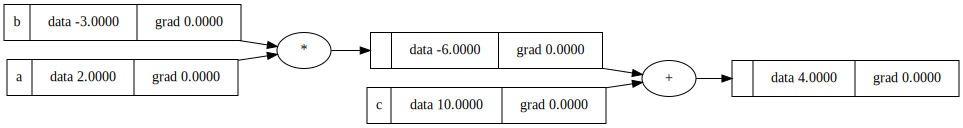

In [190]:
draw_dot(d)

In [191]:
a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
e=a*b; 
e.label="e"
d=e+c; 
d.label="d"
f=Value(-2.0,label='f')
L= d*f; L.label='L'


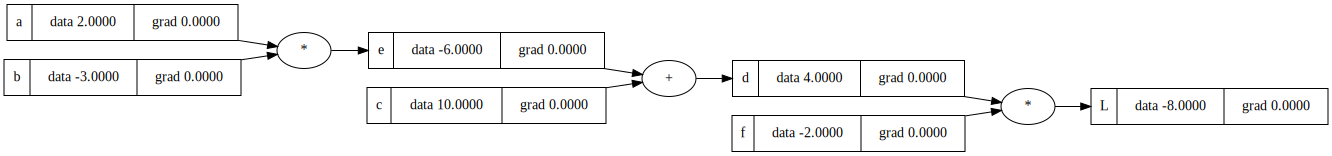

In [192]:
## After adding labels it will be easy to visualize this
draw_dot(L)

In [193]:
## Just for testing the flow
def lol():
    h=0.001
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; 
    e.label="e"
    d=e+c; 
    d.label="d"
    f=Value(-2.0,label='f')
    L= d*f; L.label='L'
    L1=L.data

    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; 
    e.label="e"
    d=e+c; 
    d.label="d"
    f=Value(-2.0,label='f')
    L= d*f; L.label='L'
    L2=L.data+h
    
    print((L2-L1)/h)

lol()

1.000000000000334


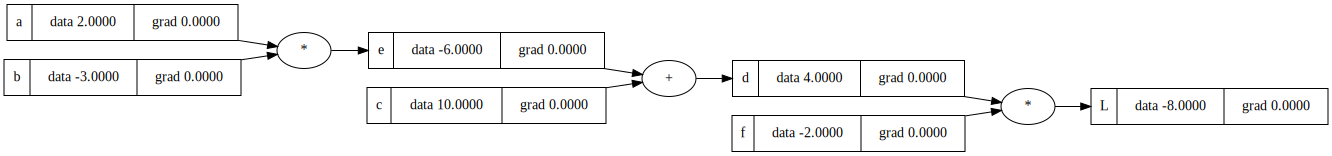

In [194]:
## If we take a looks at this diag we can see grads are zero
draw_dot(L)

In [195]:
### Setting up gradient values manually 
L.grad=1.0
d.grad=f.data
f.grad=4.0


#### Derivation
dL/dd=? f     
(f(x+h)-f(x))/h     
((d+h)*f-d*f)/h     
(d*f+h*f-d*f)/h     
(h*f)/h     
f     

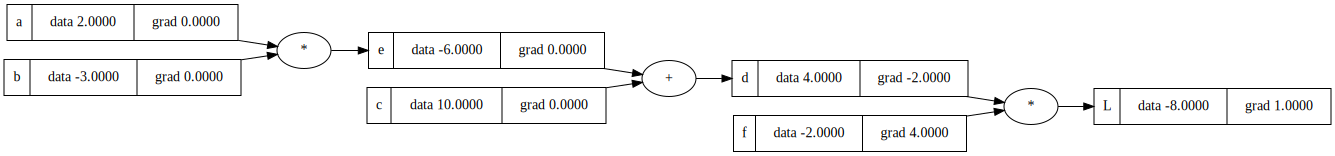

In [196]:
## Redrawing L
draw_dot(L)

In [197]:
##import
##Need to derive derivative of L w.r.t c
# dL/dc

Let's start by looking at the derivative of d wrt c      
dd/dc ?      
we know d=c+e      
def: (f(x+h)-f(x))/h      
((c+h+e)-(c+e))/h      
(c+h+e-c-e)/h      
h/h      
dd/dc=1.0    
Therefore by symmetry
dd/de=1.0


Now we can get derivative of L wrt c using the chain rule     
Chainrule: https://en.wikipedia.org/wiki/Chain_rule

So using the chain rule we can say      
We Want:      
dL/dc=(dL/dd)*(dd/dc)      

And what we should know is     
dL/dd      
dd/dc     

therefore      
dL/dc= (-2.0)*1.0
What we observe is the plus node just simply routes the gradient through


In [198]:
c.grad=-2.0
#by symmetry
e.grad=-2.0

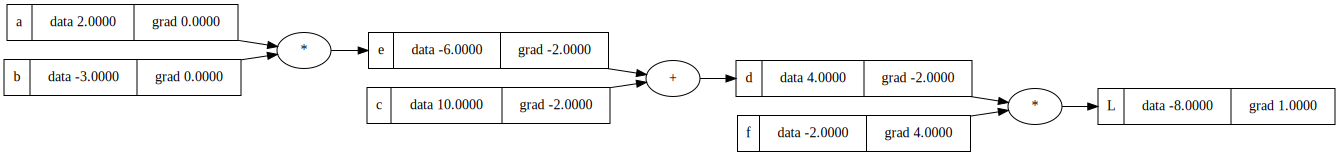

In [199]:
## Reviewing the graph
draw_dot(L)

### We need derivative of L wrt a
dL/da=(dL/de)*(de/da)

We know:    
dL/de     
and de/da=b


##### Similarly for derivative of L wrt b
dL/da=(dL/de)*(de/db)   

de/db=a

### Explaination
Yes, let’s expand it step by step, in the **same style you used for $dL/dc$**.

We are looking at

$$
e = a \cdot b
$$

and we want

$$
\frac{\partial e}{\partial a}.
$$

---

### Step 1: Recall the rule

For a product of two variables $u \cdot v$:

$$
\frac{d}{dx}(u \cdot v) = \frac{du}{dx}\cdot v + u \cdot \frac{dv}{dx}.
$$

That’s the **product rule**.

---

### Step 2: Apply to $e = a \cdot b$

Here $u = a$, $v = b$.

$$
\frac{\partial e}{\partial a} = \frac{\partial a}{\partial a}\cdot b + a \cdot \frac{\partial b}{\partial a}.
$$

---

### Step 3: Simplify

* $\frac{\partial a}{\partial a} = 1$
* $\frac{\partial b}{\partial a} = 0$ (since $b$ is independent of $a$)

So:

$$
\frac{\partial e}{\partial a} = 1 \cdot b + a \cdot 0 = b.
$$

---

### Step 4: Substitute numbers

Since $b = -3.0$:

$$
\frac{\partial e}{\partial a} = -3.0.
$$

---

### Similarly for $b$:

$$
\frac{\partial e}{\partial b} = \frac{\partial (a \cdot b)}{\partial b}
= a \cdot \frac{\partial b}{\partial b} + b \cdot \frac{\partial a}{\partial b}
= a \cdot 1 + b \cdot 0 = a.
$$

So with $a=2.0$:

$$
\frac{\partial e}{\partial b} = 2.0.
$$

---

✅ So the **derivatives at node $e$** are:

* $\frac{\partial e}{\partial a} = b = -3.0$
* $\frac{\partial e}{\partial b} = a = 2.0$

---

Would you like me to also show how these local derivatives get *multiplied with the upstream gradient* (from $L$) to produce the final backprop values $6$ and $-4$?


In [200]:
a.grad=-2.0*-3.0
b.grad=-2.0*2.0

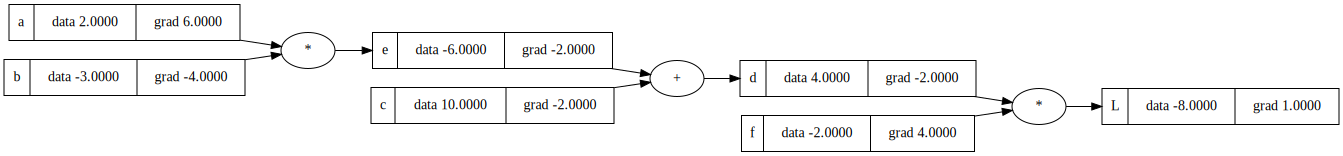

In [201]:
## visualizing it again
draw_dot(L)

## Manual Backprop finished

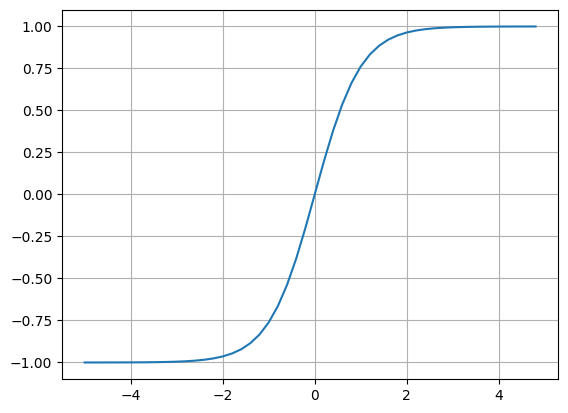

In [202]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [208]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

b=Value(6.881373587019543,label='b')

x1w1=x1*w1
x1w1.label='x1*w1'

x2w2=x2*w2
x2w2.label='x2*w2'

x1w1x2w2=x1w1+x2w2
x1w1x2w2.label= "x1w1 + x2w2"


n=x1w1x2w2+b
n.label='n'
## adding activation function
o=n.tanh()



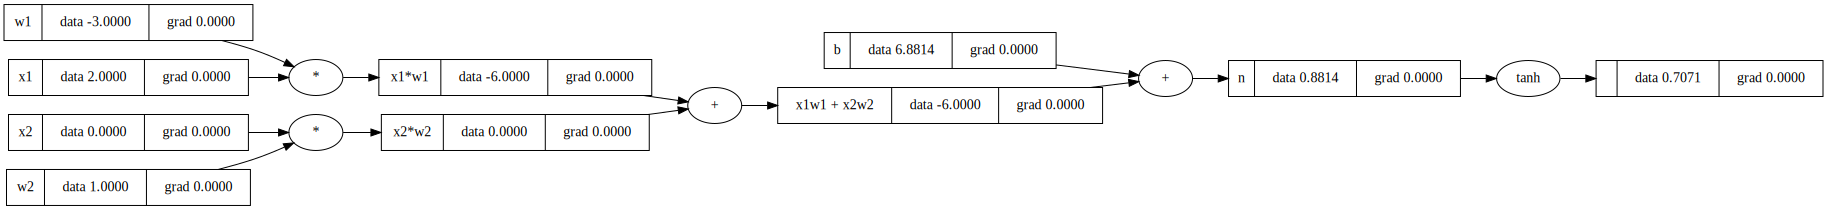

In [209]:
draw_dot(o)

### Let's start manual backprop 

## Derivativew of o wrt o
do/do =1  

In [210]:
o.grad=1.0

#### Let's backprop thorugh tanh 
we know      
o=tanh(n)      
do/dn = ?      
do/dn=1-tanh(n)**2      
do/dn=1-o ** 2      
    

In [211]:
# thereforee
o.data

0.7071067811865476

In [213]:
do_by_dn=1-o.data**2
print(do_by_dn)
n.grad=do_by_dn

0.4999999999999999


In [214]:
x1w1x2w2.grad=do_by_dn*1
b.grad=do_by_dn*1

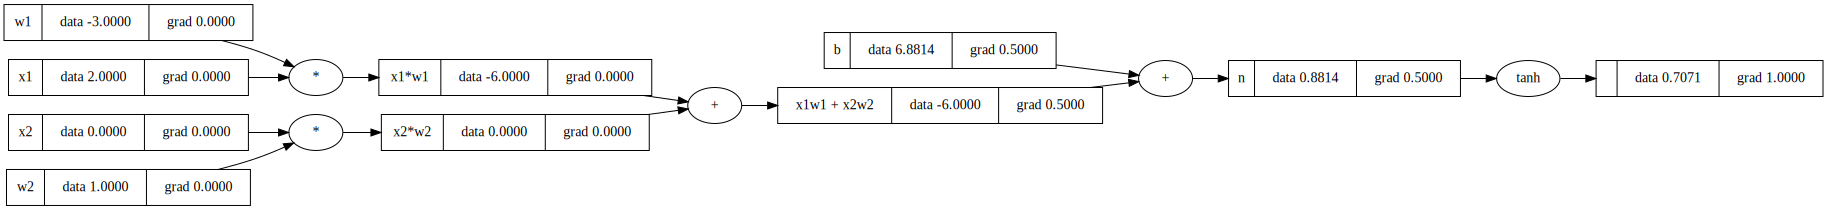

In [215]:
## visualizing progreess so faR
draw_dot(o)

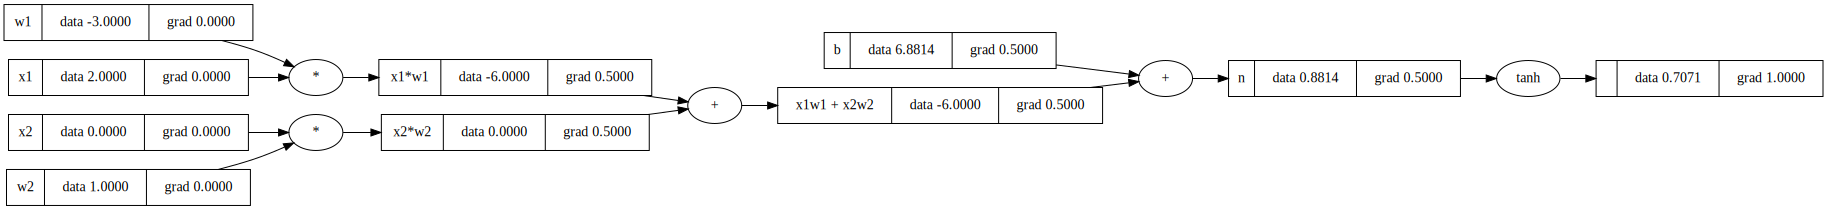

In [216]:
## continuing
x1w1.grad=do_by_dn*1*1
x2w2.grad=do_by_dn*1*1

#Visu
draw_dot(o)

In [217]:
# gradient of o wrt w1
# chain rule:
# do/dn * dn/x1w1x2w2 * dx1w1x2w2/dx1w1 * dx1w1/dx1
# therefore
x1.grad=w1.data*x1w1.grad
w1.grad=x1.data*x1w1.grad

# Similarly
x2.grad=w2.data*x2w2.grad
w2.grad=x2.data*x2w2.grad

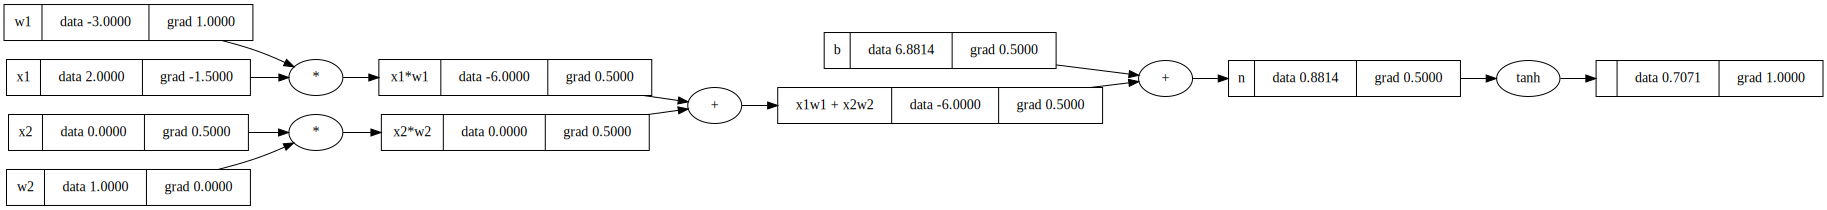

In [218]:
draw_dot(o)

## Deifining auto backprop

In [3]:
import math

class Value:
    def __init__(self,data,_children=(),_op='',label='') -> None:
        self.data=data
        #Gradient for each node initially zero
        self.grad=0.0
        ## Backward var for chain rule
        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    ## Provides a good way to return a typed format
    ## If we comment this out we will get a object string instead
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    def __add__(self,other):
        
        ## IF other is anything else we wrap it up into the value class so that it is possible to perform operation on it 
        other=other if isinstance(other,Value) else Value(other)

        out=Value(self.data + other.data,(self,other),'+')
        
        ## Defining the behaviour of gradient when working with a plus operation
        def _backward():
            #+= is used to accumilate the gradients (in case a variable is used more then once)
            self.grad+=1.0*out.grad
            other.grad+=1.0*out.grad

        ## Providing function to lambda function
        out._backward=_backward
        return out
    
    def __radd__(self,other):
        ## IF other is anything else we wrap it up into the value class so that it is possible to perform operation on it 
        other=other if isinstance(other,Value) else Value(other)

        out=Value(self.data + other.data,(self,other),'+')
        
        ## Defining the behaviour of gradient when working with a plus operation
        def _backward():
            #+= is used to accumilate the gradients (in case a variable is used more then once)
            self.grad+=1.0*out.grad
            other.grad+=1.0*out.grad

        ## Providing function to lambda function
        out._backward=_backward

        return out
   
    def __mul__(self,other):
        other=other if isinstance(other,Value) else Value(other)
        out=Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad+= other.grad * out.grad
            other.grad+=self.data * out.grad
        
        out._backward=_backward
        return out
    ## Fallback for mul function (basically converts 2*a in a*2)
    def __rmul__(self,other):
        return self * other
    
    def __neg__(self):
        return self * -1
    
    def __truediv__(self,other): #self / other
        return self*other**-1
    
    def __sub__(self,other):
        return self + (-other)

    def __rsub__(self,other):
        return self + (-other)
        
    def __pow__(self,other):
        assert isinstance(other, (int,float)), "Only supporting int/float powers for now"
        out = Value(self.data**other,(self,),f'**{other}')
        def _backward():
            self.grad+= other * (self.data ** (other-1)) * out.grad
        out._backward=_backward
        return out
    
    def tanh(self):
        x=self.data
        ## Tanh function
        ### Doc hyperbolic function : https://en.wikipedia.org/wiki/Hyperbolic_functions
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')
        def _backward():
                self.grad+=(1-t**2) * out.grad
        
        out._backward=_backward
        return out
    
    def exp(self):
        x=self.data
        out=Value(math.exp(x),(self,),'exp')
        def backward():
            self.grad+=out.data*out.grad
        out._backward=backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0
        for node in reversed(topo):
            #calling backward pass
            node._backward()
    

In [4]:
a=Value(4,label='a')
print(a*2)
print(2+a)

Value(data=8)
Value(data=6)


In [5]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

b=Value(6.881373587019543,label='b')

x1w1=x1*w1
x1w1.label='x1*w1'

x2w2=x2*w2
x2w2.label='x2*w2'

x1w1x2w2=x1w1 + x2w2
x1w1x2w2.label= "x1w1 + x2w2"


n=x1w1x2w2+b
n.label='n'
## adding activation function
o=n.tanh()



In [11]:
1-a

TypeError: '>' not supported between instances of 'Value' and 'int'

In [6]:
a-1

Value(data=3)

In [5]:
a-b

Value(data=-2.881373587019543)

In [4]:
draw_dot(o)

NameError: name 'draw_dot' is not defined

In [5]:
o.grad=1
o._backward()

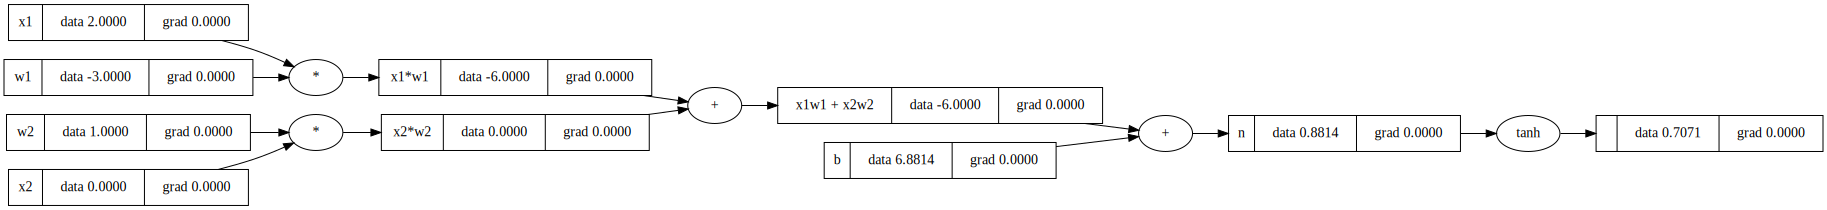

In [6]:
draw_dot(o)
## should show the grad for node n = 0.5

In [7]:
n._backward()
b._backward()

In [8]:
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()


In [28]:
### Now only thing left is to auto mate the calling of the backward function 
topo=[]
visited=set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

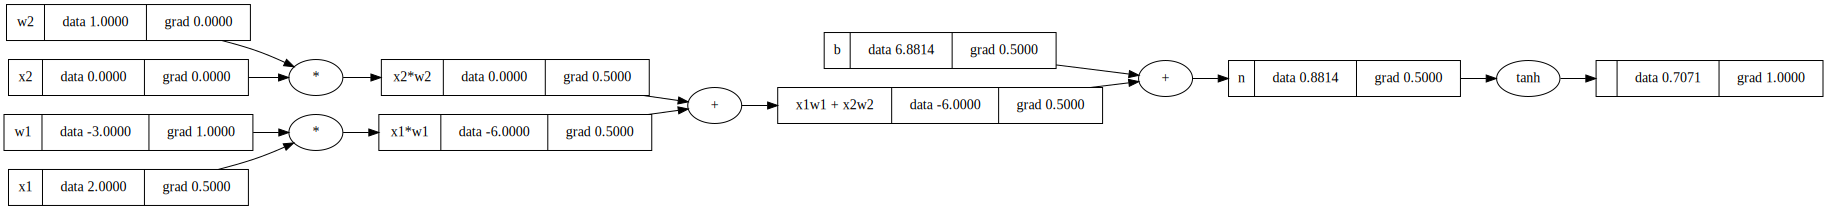

In [29]:
draw_dot(o)

In [7]:
## Letus re declare the 
import math
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

b=Value(6.881373587019543,label='b')

x1w1=x1*w1
x1w1.label='x1*w1'

x2w2=x2*w2
x2w2.label='x2*w2'

x1w1x2w2=x1w1 + x2w2
x1w1x2w2.label= "x1w1 + x2w2"




n=x1w1x2w2+b
n.label='n'

## adding tanh activation function in a different way
# ----------
e=(2*n).exp()
o=(e-1)/(e+1)
o.label='o'
# ----------
o.backward()


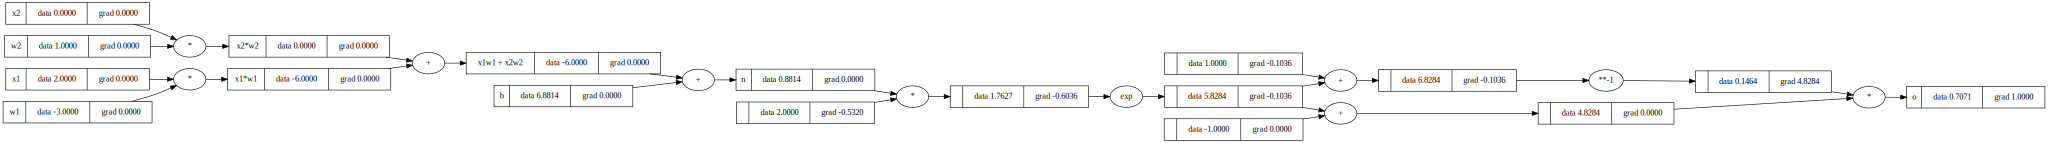

In [22]:
draw_dot(o)

In [23]:
### Now only thing left is to auto mate the calling of the backward function 
topo=[]
visited=set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=-1),
 Value(data=2),
 Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=1.7627471740390863),
 Value(data=5.828427124746192),
 Value(data=4.828427124746192),
 Value(data=1),
 Value(data=6.828427124746192),
 Value(data=0.1464466094067262),
 Value(data=0.7071067811865477)]